I was working with a 30 Day Crime CSV to get the 30 day crime incidents per neighborhood. I did this in order to see recent crime and not combined crime, as certain areas may have progressing crime since the last total crime report. To start, I read the data from the CSV and imported it into pandas.

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

crime = pd.read_csv("30 Day Crime.csv", sep=",")
crime

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,306530435,23035798,6,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,307051774,23038735,10,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,307082554,23038816,27,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,307106971,23038916,99,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,307112015,23038967,6,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,307708078,23042905,6,2023-03-23T18:30:00,"300 Block 5th Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.000290,40.440526
2949,307708273,23042913,29,2023-03-23T21:25:00,"1100 Block Crucible St Pittsburgh, PA 15220",N,Crafton Heights,6,RUNAWAYS - JUVENILE,029 Missing Juvenile,2814.0,2.0,5.0,-80.042745,40.444163
2950,307713445,23042978,13,2023-03-24T02:29:00,"600 Block Liberty Ave Pittsburgh, PA 15222",Y,Crawford-Roberts,2,RECEIVING STOLEN PROPERTY,3925 Receiving Stolen Property. / 6106 Firearm...,305.0,6.0,6.0,-80.001624,40.441781
2951,307751502,23043076,6,2023-03-08T11:00:00,"700 Block Casino Dr Pittsburgh, PA 15212",N,Chateau,1,THEFT,"3924 Theft of Property Lost, Mislaid or Delive...",2108.0,NaN,NaN,NaN,NaN


After I read in the data, I realized the only two pieces of information that made sense to work with was the incident neighborhood, and the incident description. All other information was not organized well and did not provide good information for what we were attempting to look at.

In [4]:
crimeList = crime[['INCIDENTNEIGHBORHOOD', 'INCIDENTHIERARCHYDESC']]
crimeList

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC
0,Central Business District,THEFT
1,Bedford Dwellings,TERRORISTIC THREATS
2,Homewood South,HIT AND RUN
3,Bluff,MISSING PERSONS (18+)
4,North Oakland,RETSIL THEFT (SHOPLIFTING)
...,...,...
2948,Central Business District,THEFT
2949,Crafton Heights,RUNAWAYS - JUVENILE
2950,Crawford-Roberts,RECEIVING STOLEN PROPERTY
2951,Chateau,THEFT


Since there was really only categorical data in this dataset, I decided to put the frequency of crime per neighborhood and per offence in two individual dictionaries, and I organized them in descending order to see the highest crime areas and crime category first.

In [5]:
incidentsByArea = dict()
incidentsByDesc = dict()

# Count how many crime incidents are in each area, and how many crime incidents for each description.
for index, row in crimeList.iterrows():
    n = row['INCIDENTNEIGHBORHOOD']
    d = row['INCIDENTHIERARCHYDESC']
    if n in incidentsByArea:
        incidentsByArea[n] += 1
    else:
        incidentsByArea[n] = 1
    if d in incidentsByDesc:
        incidentsByDesc[d] += 1
    else:
        incidentsByDesc[d] = 1

# Sort data
incidentsByArea = sorted(incidentsByArea.items(), key = lambda x:x[1], reverse = True)
incidentsByDesc = sorted(incidentsByDesc.items(), key = lambda x:x[1], reverse = True)


This shows the top 5 areas with the highest crime. However, we don't know what type of crime is happening in these areas.

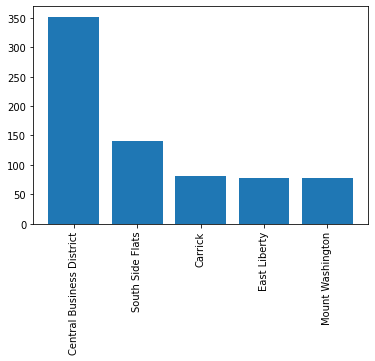

Central Business District: 352
South Side Flats: 140
Carrick: 81
East Liberty: 77
Mount Washington: 77


In [6]:
simpleIBA = dict()

# Get the top 5 areas and add them into the simpleIBA (Incident By Area) dictionary.
i = 0
for k, v in incidentsByArea:
    if i > 4:
        break
    simpleIBA[k] = v
    i += 1

# Plot
plt.bar(range(len(simpleIBA)), list(simpleIBA.values()), align='center')
plt.xticks(range(len(simpleIBA)), list(simpleIBA.keys()), rotation=90)

plt.show()

# Print the dictionary below the plot for easy readability.
for k in simpleIBA:
    print(k + ": " + str(simpleIBA[k]))

Here we can see the top 5 highest crime as past this the numbers are more insignificant that they aren't important to look at. Unfortunately, 99 is misc and is not classified, but this is the majority of the crime in these areas.

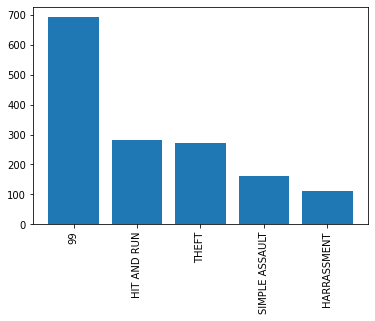

99: 692
HIT AND RUN: 282
THEFT: 271
SIMPLE ASSAULT: 161
HARRASSMENT: 110


In [52]:
simpleIBD = dict()

# Get the top 5 crime descriptions and add them into the simpleIBD (Incident By Description) dictionary.
i = 0
for k, v in incidentsByDesc:
    if i > 4:
        break
    simpleIBD[k] = v
    i += 1

# Plot
plt.bar(range(len(simpleIBD)), list(simpleIBD.values()), align='center')
plt.xticks(range(len(simpleIBD)), list(simpleIBD.keys()), rotation=90)

plt.show()

# Print the dictionary below the plot for easy readability.
for k in simpleIBD:
    print(k + ": " + str(simpleIBD[k]))

I was a bit disappointed in this data as a ton is labeled under misc. crime, and there was no real order of crime severity to check the highest severity of crime. Plus, misc. crime isn't descriptive as to what classifies as misc. crime. So I decided to read in the 2020 census neighborhood population to see how much crime is happening per person that lives there. I then read through the file and gathered the information for the total 2020 population in each area.

In [7]:
pop = pd.read_csv("2020 Neighborhood Population.csv", sep=",")

popPerNeighborhood = dict()

# Count how many crime incidents are in each area, and how many crime incidents for each description.
for index, row in pop.iterrows():
    n = row['Neighborhood']
    d = row['2020_Total_Population']
    if n not in popPerNeighborhood:
        popPerNeighborhood[n] = int(d)

# Sort data
popPerNeighborhood = sorted(popPerNeighborhood.items(), key = lambda x:x[1], reverse = True)

Now that I have the population, I decided to get a crime percentage by taking the number of incidents in an area divided by the total population for the area. Because the data considers certain neighborhoods of 11 people a valid neighborhood (even though it really isn't recognized), we are filtering out those by requiring a minimum population of 100.

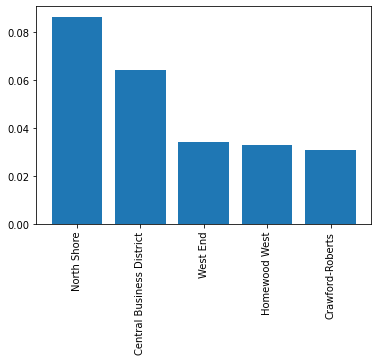

North Shore: 0.08637873754152824
Central Business District: 0.06426876027022092
West End: 0.03414634146341464
Homewood West: 0.03271028037383177
Crawford-Roberts: 0.030527692978630616


In [8]:
crimeRateNeighborhood = dict()

for kIBA, vIBA in incidentsByArea:
    for kPPN, vPPN in popPerNeighborhood:
        if str(kIBA) in str(kPPN) and vPPN > 100:
            crimeRateNeighborhood[kIBA] = vIBA / vPPN

crimeRateNeighborhood = sorted(crimeRateNeighborhood.items(), key = lambda x:x[1], reverse = True)

simpleCRN = dict()

# Get the top 5 
i = 0
for k, v in crimeRateNeighborhood:
    if i > 4:
        break
    simpleCRN[k] = v
    i += 1

# Plot
plt.bar(range(len(simpleCRN)), list(simpleCRN.values()), align='center')
plt.xticks(range(len(simpleCRN)), list(simpleCRN.keys()), rotation=90)

plt.show()

# Print the dictionary below the plot for easy readability.
for k in simpleCRN:
    print(k + ": " + str(simpleCRN[k]))

### Conclusion

Here we can see the highest crime rate is North Shore at over 8%. The second highest is Central Business District (Downtown) at over 6%. The rest of the data is between 3% and lower. Because of this, North Shore and Downtown are the outliers with a high amount of cime. Because of this, they should not be included as the highest areas with crime that is over the average of a Pittsburgh neighborhood.